### Import Libraries

In [58]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

### Load data

In [25]:
# Read the dataset
df = pd.read_csv('emotions.csv')
df.head()

,text,label
0,i feel so pissed off over an old friend and so...,anger
1,ive found it has made a huge difference especi...,anger
2,i also feel it is unfortunate that nearly all ...,sadness
3,i feel petty a href http clairee,anger
4,i used to believe that a feeling like fear was...,sadness


In [17]:
df.info

<bound method DataFrame.info of                                                     text    label
0      i feel so pissed off over an old friend and so...    anger
1      ive found it has made a huge difference especi...    anger
2      i also feel it is unfortunate that nearly all ...  sadness
3                       i feel petty a href http clairee    anger
4      i used to believe that a feeling like fear was...  sadness
...                                                  ...      ...
19995  i was i might be buying stuff from there but i...      joy
19996  i like sonam deepika and genelia who i feel ar...      joy
19997  i feel pathetic that i can hardly go a whole d...  sadness
19998  id have spent more time with her on reading i ...  sadness
19999  i do however feel like one of those pathetic g...  sadness

[20000 rows x 2 columns]>

In [18]:
# unique labels
labels_name= df['label'].unique()
labels_name

array(['anger', 'sadness', 'joy', 'love', 'fear', 'surprise'],
      dtype=object)

In [44]:
# Number of classes
num_of_classes = len(labels_name)
print('Total count of the unique labels are ',num_of_classes)

Total count of the unique labels are  6


### Preprocessing

In [55]:
# Tokenization
tokenizer = Tokenizer()

# fit the tokenizer on text data to build vocabulary
tokenizer.fit_on_texts(df['text'])

# Convert text to sequnces of integers
X = tokenizer.texts_to_sequences(df['text'])
print(X[0])

[1, 2, 14, 513, 161, 115, 76, 274, 277, 3, 68, 178]


In [52]:
# Padding the sequences to uniform lengths
maxlen=100
X = pad_sequences(X, padding='post', maxlen=maxlen)
print('Pad sequnce')
print(X)

vocab_size = len(tokenizer.word_index) + 1 # adding 1 for token padding (i.e. index zero)
print('Vocabulary size')
print(vocab_size)

Pad sequnce
[[  1   2  14 ...   0   0   0]
 [ 73 322  12 ...   0   0   0]
 [  1 116   2 ...   0   0   0]
 ...
 [  1   2 579 ...   0   0   0]
 [247  19 404 ...   0   0   0]
 [  1  38 598 ...   0   0   0]]
Vocabulary size
17097


In [53]:
list(tokenizer.word_index.items())[:20]

[('i', 1),
 ('feel', 2),
 ('and', 3),
 ('to', 4),
 ('the', 5),
 ('a', 6),
 ('feeling', 7),
 ('that', 8),
 ('of', 9),
 ('my', 10),
 ('in', 11),
 ('it', 12),
 ('like', 13),
 ('so', 14),
 ('im', 15),
 ('for', 16),
 ('me', 17),
 ('was', 18),
 ('have', 19),
 ('but', 20)]

In [29]:
# Label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])
print(y)

#One-Hot Encode the labels
y = to_categorical(y)
print(y)

[0 0 4 ... 4 4 4]
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [45]:
#train,test-split
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f'Shape of the training data: {x_train.shape},{y_train.shape}')
print(f'Shape of the test data: {x_test.shape},{y_test.shape}')
print(f'Shape of the test data: {x_val.shape},{y_val.shape}')


Shape of the training data: (12800, 100),(12800, 6)
Shape of the test data: (4000, 100),(4000, 6)
Shape of the test data: (3200, 100),(3200, 6)


### Create model

In [56]:
embedding_dim= 50
model = Sequential([

Embedding(input_dim= vocab_size, output_dim=embedding_dim ,input_length= maxlen),
LSTM(128, activation='relu'),
Dropout(0.5),
Dense(num_of_classes, activation='softmax')
])
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


### Train the model

In [57]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10


400/400 [==============================] - 66s 151ms/step - loss: 1.5994 - accuracy: 0.3323 - val_loss: 1.5905 - val_accuracy: 0.3344
Epoch 2/10
400/400 [==============================] - 58s 144ms/step - loss: 1.5810 - accuracy: 0.3288 - val_loss: 1.5917 - val_accuracy: 0.3344
Epoch 3/10
400/400 [==============================] - 46s 116ms/step - loss: 1.5783 - accuracy: 0.3323 - val_loss: 1.5913 - val_accuracy: 0.3344
Epoch 4/10
400/400 [==============================] - 58s 145ms/step - loss: 1.5769 - accuracy: 0.3349 - val_loss: 1.5904 - val_accuracy: 0.3344
Epoch 5/10
400/400 [==============================] - 56s 140ms/step - loss: 1.5759 - accuracy: 0.3355 - val_loss: 1.5910 - val_accuracy: 0.3344
Epoch 6/10
400/400 [==============================] - 59s 147ms/step - loss: 1.5751 - accuracy: 0.3339 - val_loss: 1.5906 - val_accuracy: 0.3344
Epoch 7/10
400/400 [==============================] - 67s 167ms/step - loss: 1.5764 - accuracy: 0.3370 - val_loss: 1.5902 - val_

### Visualize the model performance

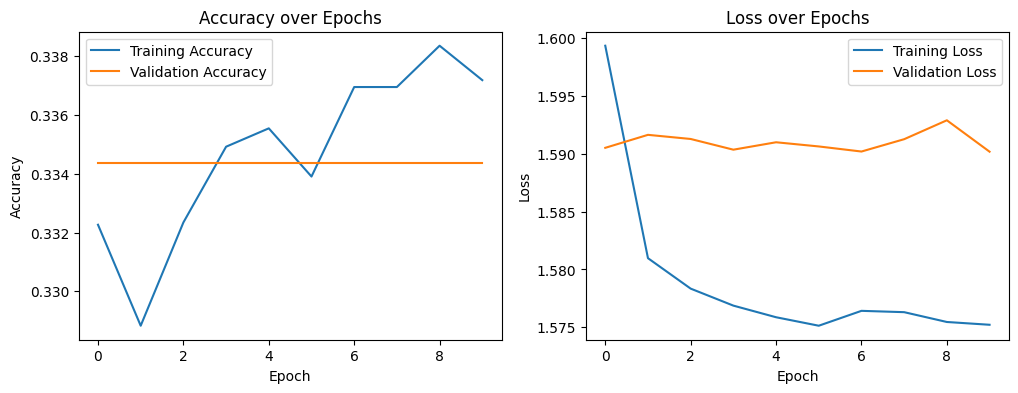

In [61]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
